In [1]:
import h5py
import numpy as np
import math
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# **Read Data**

In [2]:
file = h5py.File("da1dog.h5", 'r+')
print(file.keys())

<KeysViewHDF5 ['x', 'y']>


# **Train, test split**

In [3]:
from sklearn.model_selection import train_test_split


data = np.array(file['/x'])
target = np.array(file['/y'])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [4]:
print("Shape of training set: {}".format(X_train.shape))
print("Shape of testing set: {}".format(X_test.shape))
print("Shape of testing set: {}".format(y_train.shape))
print("Shape of testing set: {}".format(y_test.shape))

Shape of training set: (11200, 10000)
Shape of testing set: (2800, 10000)
Shape of testing set: (11200,)
Shape of testing set: (2800,)


# **PCA**

In [5]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')
        
H=100
W=100

#Fine the mean_images
mean_image=np.mean(X_train, axis=0)

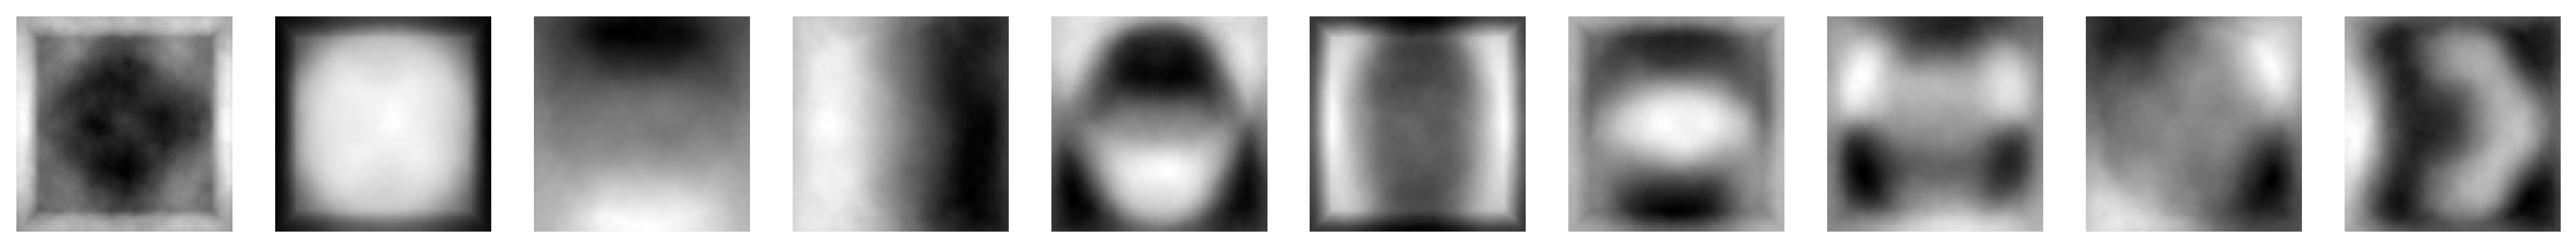

In [6]:
from sklearn.decomposition import PCA
n_components = 10

# Extracting the top 40 eigenfaces from the dataset
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

# Showing the eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:,:], H, W)
plt.show()

eigenfaces = eigenfaces.reshape((n_components, H, W))

In [7]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# **XGBClassifier**

In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [9]:
xgb0 = xgb.XGBClassifier()
xgb0.fit(X_train, y_train)

pred0 = xgb0.predict(X_test)

print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred0)))

Accuracy score (testing): 0.810


# **n_estimators**

In [10]:
lista = [10,50,100,300,500,1000,1500,2000]

for a in lista:
    xgb0 = xgb.XGBClassifier(n_estimators = a)
    xgb0.fit(X_train, y_train)
    pred0 = xgb0.predict(X_test)
    print("parameter : ", a)
    print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred0)))

parameter :  10
Accuracy score (testing): 0.637
parameter :  50
Accuracy score (testing): 0.757
parameter :  100
Accuracy score (testing): 0.810
parameter :  300
Accuracy score (testing): 0.850
parameter :  500
Accuracy score (testing): 0.850
parameter :  1000
Accuracy score (testing): 0.853
parameter :  1500
Accuracy score (testing): 0.854
parameter :  2000
Accuracy score (testing): 0.853


# **gamma, n_estimators = 1500**

In [15]:
lista = [0.0001,0.001,0.01,0.1,0.3,0.5,1,10]

for a in lista:
    xgb0 = xgb.XGBClassifier(n_estimators = 1500, gamma = a)
    xgb0.fit(X_train, y_train)
    pred0 = xgb0.predict(X_test)
    print("parameter : ", a)
    print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred0)))

parameter :  0.0001
Accuracy score (testing): 0.856
parameter :  0.001
Accuracy score (testing): 0.851
parameter :  0.01
Accuracy score (testing): 0.854
parameter :  0.1
Accuracy score (testing): 0.839
parameter :  0.3
Accuracy score (testing): 0.829
parameter :  0.5
Accuracy score (testing): 0.819
parameter :  1
Accuracy score (testing): 0.785
parameter :  10
Accuracy score (testing): 0.630


# **learning_rate,gamma = 0.0001, n_estimators = 1500**

In [16]:
lista = [0.0001,0.001,0.01,0.1,0.3,0.5,1]

for a in lista:
    xgb0 = xgb.XGBClassifier(n_estimators = 1500, gamma = 0.0001, learning_rate=a)
    xgb0.fit(X_train, y_train)
    pred0 = xgb0.predict(X_test)
    print("parameter : ", a)
    print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred0)))

parameter :  0.0001
Accuracy score (testing): 0.543
parameter :  0.001
Accuracy score (testing): 0.592
parameter :  0.01
Accuracy score (testing): 0.759
parameter :  0.1
Accuracy score (testing): 0.850
parameter :  0.3
Accuracy score (testing): 0.856
parameter :  0.5
Accuracy score (testing): 0.844
parameter :  1
Accuracy score (testing): 0.842


# **max_depth, gamma = 0.0001, n_estimators = 1500**

In [17]:
lista = [1,10,30,50,70,100]

for a in lista:
    xgb0 = xgb.XGBClassifier(n_estimators = 1500, gamma = 0.0001, max_depth=a)
    xgb0.fit(X_train, y_train)
    pred0 = xgb0.predict(X_test)
    print("parameter : ", a)
    print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred0)))

parameter :  1
Accuracy score (testing): 0.499
parameter :  10
Accuracy score (testing): 0.862
parameter :  30
Accuracy score (testing): 0.864
parameter :  50
Accuracy score (testing): 0.866
parameter :  70
Accuracy score (testing): 0.866
parameter :  100
Accuracy score (testing): 0.866


# **min_child_weight,max_depth=50, gamma = 0.0001, n_estimators = 1500**

In [19]:
lista = [1,10,50,100]

for a in lista:
    xgb0 = xgb.XGBClassifier(n_estimators = 1500, gamma = 0.0001, max_depth = 50,min_child_weight=a)
    xgb0.fit(X_train, y_train)
    pred0 = xgb0.predict(X_test)
    print("parameter : ", a)
    print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred0)))

parameter :  1
Accuracy score (testing): 0.866
parameter :  10
Accuracy score (testing): 0.852
parameter :  50
Accuracy score (testing): 0.819
parameter :  100
Accuracy score (testing): 0.787


# **max_delta_step,max_depth=50, gamma = 0.0001, n_estimators = 1500**

In [20]:
lista = [1,10,50,100]

for a in lista:
    xgb0 = xgb.XGBClassifier(n_estimators = 1500, gamma = 0.0001, max_depth = 50,max_delta_step=a)
    xgb0.fit(X_train, y_train)
    pred0 = xgb0.predict(X_test)
    print("parameter : ", a)
    print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred0)))

parameter :  1
Accuracy score (testing): 0.864
parameter :  10
Accuracy score (testing): 0.866
parameter :  50
Accuracy score (testing): 0.866
parameter :  100
Accuracy score (testing): 0.866


### *Best result :max_depth=50, gamma = 0.0001, n_estimators = 1500**

In [26]:
xgb = xgb.XGBClassifier(max_depth=50, gamma = 0.0001, n_estimators = 1500)
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred)))

Accuracy score (testing): 0.866


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,labels=xgb.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       396
           1       0.87      0.84      0.85       425
           2       0.86      0.86      0.86       408
           3       0.87      0.91      0.89       399
           4       0.81      0.85      0.83       388
           5       0.88      0.90      0.89       392
           6       0.90      0.86      0.88       392

    accuracy                           0.87      2800
   macro avg       0.87      0.87      0.87      2800
weighted avg       0.87      0.87      0.87      2800



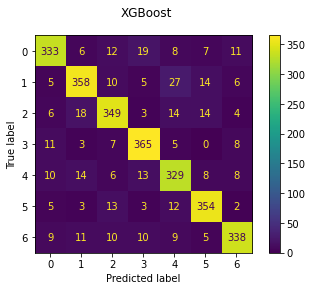

In [28]:
fig = plot_confusion_matrix(xgb,X_test, y_test, display_labels=xgb.classes_)
fig.figure_.suptitle("XGBoost")
plt.show()